 10   9    8    7    6    5    4    3    2    1  
 11   44   43   42   41   40   39   38   37   36 
 12   45   70   69   68   67   66   65   64   35 
 13   46   71   88   87   86   85   84   63   34 
 14   47   72   89   98   97   96   83   62   33 
 15   48   73   90   99  100   95   82   61   32 
 16   49   74   91   92   93   94   81   60   31 
 17   50   75   76   77   78   79   80   59   30 
 18   51   52   53   54   55   56   57   58   29 
 19   20   21   22   23   24   25   26   27   28 
[[0, 0, 8, 7, 6, 5, 4, 3, 2, 1], [0, 0, 43, 0, 41, 0, 0, 38, 37, 36], [12, 45, 0, 0, 0, 0, 0, 65, 0, 0], [13, 0, 0, 0, 0, 86, 0, 84, 63, 34], [14, 47, 0, 0, 0, 97, 0, 83, 0, 33], [15, 0, 0, 90, 99, 0, 95, 0, 0, 32], [16, 0, 0, 0, 0, 93, 0, 81, 60, 31], [17, 50, 75, 76, 77, 0, 79, 0, 59, 0], [0, 51, 0, 53, 0, 0, 56, 57, 0, 29], [0, 20, 0, 22, 23, 24, 25, 0, 27, 0]]
 0    0    8    7    6    5    4    3    2    1  
 0    0    43   0    41   0    0    38   37   36 
 12   45   0    0    0    0    0 

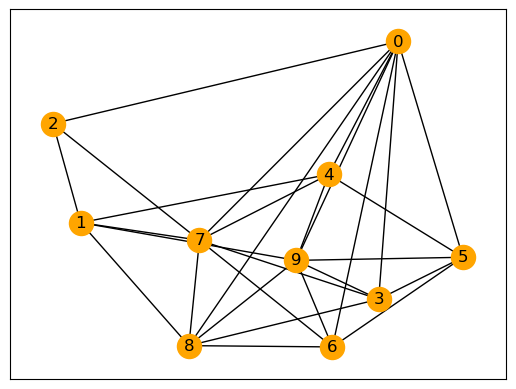

{0: {2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 3, 8: 2, 9: 1}, 1: {2: 43, 4: 41, 7: 38, 8: 37, 9: 36}, 2: {0: 12, 1: 45, 7: 65}, 3: {0: 13, 5: 86, 7: 84, 8: 63, 9: 34}, 4: {0: 14, 1: 47, 5: 97, 7: 83, 9: 33}, 5: {0: 15, 3: 90, 4: 99, 6: 95, 9: 32}, 6: {0: 16, 5: 93, 7: 81, 8: 60, 9: 31}, 7: {0: 17, 1: 50, 2: 75, 3: 76, 4: 77, 6: 79, 8: 59}, 8: {0: 0, 1: 51, 3: 53, 6: 56, 7: 57, 9: 29}, 9: {0: 0, 1: 20, 3: 22, 4: 23, 5: 24, 6: 25, 8: 27}}
{0: 64, 1: 49, 2: 72, 3: 51, 4: 52, 5: 53, 6: 54, 7: 57, 8: 0, 9: 29}
{0: 3, 1: 9, 2: 0, 3: 9, 4: 9, 5: 9, 6: 9, 7: 8, 8: None, 9: 8}
([8, 9, 3, 0], 3, 64)


In [7]:
import numpy as np
import itertools
import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt
import numpy.random 
import random as rn


# создаем граф 
G = nx.Graph()

def print_spiral(n):
    matrix = [[0]*n for i in range(n)]
    count = 1
    for layer in range(int((n+1)/2)):
        for i in range(n-layer-1, layer-1, -1):
            matrix[layer][i] = count
            count += 1
        for i in range(layer+1, n-layer):
            matrix[i][layer] = count
            count += 1
        for i in range(layer+1, n-layer-1, 1):
            matrix[n-layer-1][i] = count
            count += 1
        for i in range(n-layer-1, layer, -1):
            matrix[i][n-layer-1] = count
            count += 1
    for row in matrix:
       print(' '.join([str(elem).center(4) for elem in row]))
    return matrix

num = 10
matrix = print_spiral(num)

for i in range(num):
    matrix[i][i] = 0
for i in range(20):
    a, b = rn.sample(range(num), 2)
    matrix[a][b] = matrix[b][a] = rn.randint(1, 10)
    matrix[a][b] = matrix[b][a] = 0  
    matrix[9][0]=0
    matrix[8][0]=0
print(matrix)

for row in matrix:
    print(' '.join([str(elem).center(4) for elem in row]))
#Задаём вес рёбрам графа
G.add_nodes_from([i for i in range(num)])
listn = []

for i in range(num):
    for j in range(i + 1, num):
        if matrix[i][j] != 0:
            listn.append((i, j, {'weight': matrix[i][j]}))
G.add_edges_from(listn)


# выводим граф на экран
nx.draw_networkx(nx.relabel_nodes(G, nx.get_node_attributes(G, 'text')), 
                  with_labels=True, node_color = 'orange')
plt.show()
def minty_algorithm(graph, start, end):
    # Инициализация словаря расстояний
    distances = {}
    for vertex in graph:
        distances[vertex] = float('inf')
    distances[start] = 0
    
    # Инициализация словаря предков
    predecessors = {}
    for vertex in graph:
        predecessors[vertex] = None
    
    # Вычисление кратчайшего пути
    for i in range(len(graph)-1):
        flag=False
        for u in graph:
            for v in graph[u]:
                if distances[u] + graph[u][v] < distances[v]:
                    if graph[u][v]==0:
                        continue
                    distances[v] = distances[u] + graph[u][v]
                    predecessors[v] = u
                    if predecessors[end]==u:
                        flag=True 
                        break
            if flag:
                break
    # Построение пути
    path = []
    current = end
    while current != start:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()
    print(distances)
    print(predecessors)
    # Возвращение кратчайшего пути, количества шагов и веса пути
    return (path, len(path)-1, distances[end])
graph={i: {j:matrix[i][j] for j in  G.neighbors(i)} for i in G.nodes  }
print(graph)
lenn=minty_algorithm(graph, 8, 0) 
print(lenn)

 10   9    8    7    6    5    4    3    2    1  
 11   44   43   42   41   40   39   38   37   36 
 12   45   70   69   68   67   66   65   64   35 
 13   46   71   88   87   86   85   84   63   34 
 14   47   72   89   98   97   96   83   62   33 
 15   48   73   90   99  100   95   82   61   32 
 16   49   74   91   92   93   94   81   60   31 
 17   50   75   76   77   78   79   80   59   30 
 18   51   52   53   54   55   56   57   58   29 
 19   20   21   22   23   24   25   26   27   28 
[[0, 0, 8, 7, 6, 0, 4, 3, 2, 0], [0, 0, 43, 0, 0, 40, 39, 38, 37, 0], [12, 45, 0, 69, 0, 0, 66, 0, 64, 0], [13, 0, 71, 0, 87, 86, 0, 84, 63, 34], [14, 0, 0, 89, 0, 0, 96, 83, 62, 33], [0, 48, 0, 90, 0, 0, 0, 82, 0, 0], [16, 49, 74, 0, 92, 0, 0, 81, 60, 0], [17, 50, 0, 76, 77, 78, 79, 0, 0, 0], [18, 51, 52, 53, 54, 0, 56, 0, 0, 29], [0, 0, 0, 22, 23, 0, 0, 0, 27, 0]]
 0    0    8    7    6    0    4    3    2    0  
 0    0    43   0    0    40   39   38   37   0  
 12   45   0    69   0    0    

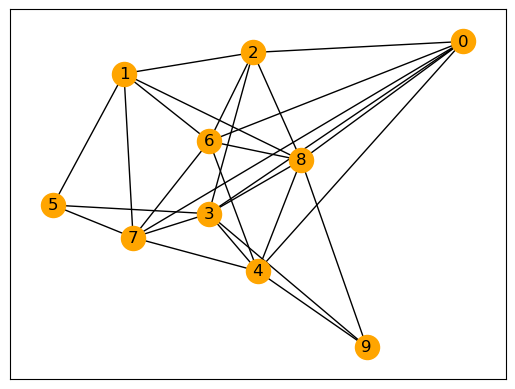

{0: {2: 8, 3: 7, 4: 6, 6: 4, 7: 3, 8: 2}, 1: {2: 43, 5: 40, 6: 39, 7: 38, 8: 37}, 2: {0: 12, 1: 45, 3: 69, 6: 66, 8: 64}, 3: {0: 13, 2: 71, 4: 87, 5: 86, 7: 84, 8: 63, 9: 34}, 4: {0: 14, 3: 89, 6: 96, 7: 83, 8: 62, 9: 33}, 5: {1: 48, 3: 90, 7: 82}, 6: {0: 16, 1: 49, 2: 74, 4: 92, 7: 81, 8: 60}, 7: {0: 17, 1: 50, 3: 76, 4: 77, 5: 78, 6: 79}, 8: {0: 18, 1: 51, 2: 52, 3: 53, 4: 54, 6: 56, 9: 29}, 9: {3: 22, 4: 23, 8: 27}}
{0: 0, 1: 53, 2: 8, 3: 7, 4: 6, 5: 81, 6: 4, 7: 3, 8: 2, 9: 31}
{0: None, 1: 2, 2: 0, 3: 0, 4: 0, 5: 7, 6: 0, 7: 0, 8: 0, 9: 8}
([0, 8, 9], 2, 31)
[0, 8] [9]


In [28]:
import numpy as np
import itertools
import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt
import numpy.random 
import random as rn
import heapq

# Класс для представления вершин графа
class Node:
    def __init__(self, value, level, path, bound):
        self.value = value
        self.level = level
        self.path = path
        self.bound = bound

    # Метод, который формирует очередь с приоритетами для поиска в ширину
    def __lt__(self, other):
        return self.bound < other.bound

# Метод для поиска минимального пути через граф с помощью метода ветвей и границ
def branch_and_bound(graph, start_node, end_node):
    # Формирование очереди с приоритетами
    queue = []
    heapq.heappush(queue, start_node)

    # Основной цикл для обхода вершин графа
    while len(queue) != 0:
        current_node = heapq.heappop(queue)
        # Если достигнут конечный узел - завершение поиска
        if current_node.value == end_node:
            return current_node.path , [current_node.value]
        # Если не достигнут конечный узел, выполняется раскрытие узла
        else:
            children = []  # список для хранения дочерних узлов
            # Производится перебор соседних вершин
            for adjacent_node in graph[current_node.value]:
                # Проверка на отсутствие вершины в текущем пути   
                if adjacent_node not in current_node.path:
                    # Вычисление оценки для дочернего узла
                    bound = len(current_node.path) + 1 + len(graph.keys()) - adjacent_node
                    # Создание дочернего узла
                    child_node = Node(adjacent_node, current_node.level + 1, current_node.path + [current_node.value], bound)
                    children.append(child_node)
            # Добавление дочерних узлов в очередь с приоритетами
            for child in sorted(children):
                heapq.heappush(queue, child)

    # Если путь не найден - выводим сообщение об этом
    return "No path found."



# создаем граф 
G = nx.Graph()

def print_spiral(n):
    matrix = [[0]*n for i in range(n)]
    count = 1
    for layer in range(int((n+1)/2)):
        for i in range(n-layer-1, layer-1, -1):
            matrix[layer][i] = count
            count += 1
        for i in range(layer+1, n-layer):
            matrix[i][layer] = count
            count += 1
        for i in range(layer+1, n-layer-1, 1):
            matrix[n-layer-1][i] = count
            count += 1
        for i in range(n-layer-1, layer, -1):
            matrix[i][n-layer-1] = count
            count += 1
    for row in matrix:
       print(' '.join([str(elem).center(4) for elem in row]))
    return matrix

num = 10
matrix = print_spiral(num)
#обозначаем вершины которые не достичь нулём
for i in range(num):
    matrix[i][i] = 0
for i in range(20):
    a, b = rn.sample(range(num), 2)
    matrix[a][b] = matrix[b][a] = rn.randint(1, 10)
    matrix[a][b] = matrix[b][a] = 0 
print(matrix)
#выводим матрицу
for row in matrix:
    print(' '.join([str(elem).center(4) for elem in row]))
#Задаём вес рёбрам графа
G.add_nodes_from([i for i in range(num)])
listn = []

for i in range(num):
    for j in range(i + 1, num):
        if matrix[i][j] != 0:
            listn.append((i, j, {'weight': matrix[i][j]}))
G.add_edges_from(listn)


# выводим граф на экран
nx.draw_networkx(nx.relabel_nodes(G, nx.get_node_attributes(G, 'text')), 
                  with_labels=True, node_color = 'orange')
plt.show()
def minty_algorithm(graph, start, end):
    # Инициализация словаря расстояний
    distances = {}
    for vertex in graph:
        distances[vertex] = float('inf')
    distances[start] = 0
    
    # Инициализация словаря предков
    predecessors = {}
    for vertex in graph:
        predecessors[vertex] = None
    
    # Вычисление кратчайшего пути
    for i in range(len(graph)-1):
        flag=False
        for u in graph:
            for v in graph[u]:
                if distances[u] + graph[u][v] < distances[v]:
                    if graph[u][v]==0:
                        continue
                    distances[v] = distances[u] + graph[u][v]
                    predecessors[v] = u
                    # завершение поиска
                    if predecessors[end]==u:
                        flag=True 
                        break
            if flag:
                break
    # Построение пути
    path = []
    current = end
    while current != start:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()
    print(distances)
    print(predecessors)
    # Возвращение кратчайшего пути, количества шагов и веса пути
    return (path, len(path)-1, distances[end])
graph={i: {j:matrix[i][j] for j in  G.neighbors(i)} for i in G.nodes  }
print(graph)
lenn=minty_algorithm(graph, 0, 9) 
print(lenn)
# Пример использования
start_node = Node(0, 0, [], len(graph.keys()))
end_node = 9
a,b=branch_and_bound(graph, start_node, end_node)
print(a,b)